In [1]:
from openpyxl import load_workbook
import pandas as pd

In [4]:
wb = load_workbook(filename='data-minimalis.xlsx')
dataset = pd.DataFrame(wb['Sheet1'].values)
dataset.columns = ['Judul']
dataset

,Judul
0,Penerapan antarmuka bahasa alami dalam pencari...
1,System reminder aktifitas akademik dosen
2,Perancangan Sistem Test Komputerisasi dan Pend...
3,Pengolahan Bahasa Alami pada Agen Cerdas Alat ...
4,Perancangan dan implementasi system pengenalan...
5,Pengembangan Template Media Pembelajaran Berba...
6,Membangun system informasi eksekutif (SIE) den...
7,Perancangan visualisasi informasi untuk system...
8,Pengembangan Sistem Penilaian Kerja Dosen deng...
9,Perancangan animasi wayang pendidikan sebagai...


In [3]:
# sheet_terpilih = wb['Sheet1']
# df = pd.DataFrame(sheet_terpilih.values)
# df

In [4]:
# df.columns =['judul']
# print(df)
# df['judul']

In [5]:
list_judul=[]
for ai in data['judul']:
#     print(ai)
    list_judul.append(str(ai))
list_judul

['Penerapan antarmuka bahasa alami dalam pencarian informasi skripsi pada suatu program studi ',
 'System reminder aktifitas akademik dosen ',
 'Perancangan Sistem Test Komputerisasi dan Pendukung Keputusan Penerimaan Pegawai',
 'Pengolahan Bahasa Alami pada Agen Cerdas Alat Bantu Konsultasi Zakat',
 'Perancangan dan implementasi system pengenalan  jenis kulit hewan unutk kerajinan kulit berbasis system cerdas ',
 'Pengembangan Template Media Pembelajaran Berbasis Flash',
 'Membangun system informasi eksekutif (SIE) dengan menggunakan pendekatan system cerdas ',
 'Perancangan visualisasi informasi untuk system evaluasi guru ',
 'Pengembangan Sistem Penilaian Kerja Dosen dengan Aspek IKD dan SKP 2014 Berbasis Online',
 'Perancangan animasi wayang  pendidikan sebagai pengembangan media edukasi sekolah ',
 'Studi Deskriptif: Penyebab dan Bentuk Perilaku Mencontek pada SMP Muhammadiyah se-Kota Yogyakarta Tahun 2012/2013']

In [7]:
# coding: utf8
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory # Rumus Library
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string # Rumus Library
import sys # Rumus supaya baca command promp
import re

stemmer = StemmerFactory().create_stemmer() # Object stemmer
remover = StopWordRemoverFactory().create_stop_word_remover() # objek stopword

In [8]:
def preprocess(text):
    text = text.lower() # lowercase, bisa semua sama
    text_clean = remover.remove(text) # fungsi hapus stopword dan remover (warna merah) berasal dari objek
#     preprocessed_text = text_clean.translate(None, string.punctuation) # fungsi hapus punctiation atau . , ; dll  dan
    # text_clean (warna merah) dari variabel atasnya
    text_stem = stemmer.stem(text_clean)
    return text_stem
# preprocess(list_judul[1])
pre_judul = []
for juduls in list_judul:
    pre_judul.append(preprocess(juduls))
pre_judul


['terap antarmuka bahasa alami cari informasi skripsi suatu program studi',
 'system reminder aktifitas akademik dosen',
 'ancang sistem test komputerisasi dukung putus terima pegawai',
 'olah bahasa alami agen cerdas alat bantu konsultasi zakat',
 'ancang implementasi system kenal jenis kulit hewan unutk rajin kulit bas system cerdas',
 'kembang template media ajar bas flash',
 'bangun system informasi eksekutif sie guna dekat system cerdas',
 'ancang visualisasi informasi system evaluasi guru',
 'kembang sistem nilai kerja dosen aspek ikd skp 2014 bas online',
 'ancang animasi wayang didik kembang media edukasi sekolah',
 'studi deskriptif sebab bentuk perilaku contek smp muhammadiyah se-kota yogyakarta tahun 2012 2013']

In [9]:
pre_judul

['terap antarmuka bahasa alami cari informasi skripsi suatu program studi',
 'system reminder aktifitas akademik dosen',
 'ancang sistem test komputerisasi dukung putus terima pegawai',
 'olah bahasa alami agen cerdas alat bantu konsultasi zakat',
 'ancang implementasi system kenal jenis kulit hewan unutk rajin kulit bas system cerdas',
 'kembang template media ajar bas flash',
 'bangun system informasi eksekutif sie guna dekat system cerdas',
 'ancang visualisasi informasi system evaluasi guru',
 'kembang sistem nilai kerja dosen aspek ikd skp 2014 bas online',
 'ancang animasi wayang didik kembang media edukasi sekolah',
 'studi deskriptif sebab bentuk perilaku contek smp muhammadiyah se-kota yogyakarta tahun 2012 2013']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA

class Engine:
    def __init__(self):
        self.cosine_score = []
        self.train_set = [] #Documents
        self.test_set = [] #Query

    def addDocument(self, word):
        self.train_set.append(word)

    def setQuery(self, word):
        self.test_set.append(word)

    def process_score(self):
        stopWords = stopwords.words('english')
        vectorizer = CountVectorizer()

        transformer = TfidfTransformer()
        
        trainVectorizerArray = vectorizer.fit_transform(self.train_set).toarray()
        testVectorizerArray = vectorizer.transform(self.test_set).toarray()
    
        cx = lambda a, b : round(np.inner(a, b)/(LA.norm(a)*LA.norm(b)), 3)
#         print testVectorizerArray
        output = []
        for i in range(0,len(testVectorizerArray)):
            output.append([])
            
            
        for vector in trainVectorizerArray:
            # print vector
            u = 0
            for testV in testVectorizerArray:
                # print testV
                cosine = cx(vector, testV)
#                 self.cosine_score.append(cosine)
                output[u].append(cosine)
                u = u + 1
        return output
        # return testVectorizerArray

    def check_tag(self,tag,tags):
        # data_tag = tag.split(',')
        # data_tags = tags.split(',')
        stat = False
        if tag in tags:
            stat = True

        return stat


In [13]:
import string # Rumus Library
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import sys
import json
from pprint import pprint

def stemmerEN(text):
    porter = PorterStemmer()
    stop = set(stopwords.words('english'))
    text = text.lower()
    text = [i for i in text.lower().split() if i not in stop]
    text = ' '.join(text)
    preprocessed_text = text.translate(None, string.punctuation)
    text_stem = porter.stem(preprocessed_text)
    return text_stem

judul = [str(x) for x in pre_judul]


uji=pre_judul
list_datauji =pre_judul
match_tags = []
match_tags_full = []
match_title = []
# target_title=[]
# print stemmerEN("A bayesian mixture model with linear regression mixing proportions")

engine = Engine()
list_dokumen = [str(x) for x in judul]
list_datauji = [str(x) for x in list_datauji]
for dok in list_dokumen:
    engine.addDocument(dok)

for doku in list_datauji:
    engine.setQuery(doku)
    
titles_score = engine.process_score()
len(titles_score)

titles_score

[[1.0, 0.0, 0.0, 0.211, 0.0, 0.0, 0.095, 0.129, 0.0, 0.0, 0.085],
 [0.0, 1.0, 0.0, 0.0, 0.217, 0.0, 0.27, 0.183, 0.135, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.086, 0.0, 0.0, 0.144, 0.107, 0.125, 0.0],
 [0.211, 0.0, 0.0, 1.0, 0.081, 0.0, 0.101, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.217, 0.086, 0.081, 1.0, 0.099, 0.366, 0.297, 0.073, 0.086, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.099, 1.0, 0.0, 0.0, 0.246, 0.289, 0.0],
 [0.095, 0.27, 0.0, 0.101, 0.366, 0.0, 1.0, 0.369, 0.0, 0.0, 0.0],
 [0.129, 0.183, 0.144, 0.0, 0.297, 0.0, 0.369, 1.0, 0.0, 0.144, 0.0],
 [0.0, 0.135, 0.107, 0.0, 0.073, 0.246, 0.0, 0.0, 1.0, 0.107, 0.0],
 [0.0, 0.0, 0.125, 0.0, 0.086, 0.289, 0.0, 0.144, 0.107, 1.0, 0.0],
 [0.085, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

In [14]:
import numpy as np
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    wikwik = np.random.shuffle(index_shuf)
#     print (wikwik)
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])
    print(M)

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

In [15]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# import kmedoids

# 3 points in dataset
data = np.array(titles_score)

# distance matrix
D = pairwise_distances(data, metric='euclidean')

# split into 2 clusters
M, C = kMedoids(D, 5)

print('medoids:')
for point_idx in M:
    print( data[point_idx] )
hasil =[]
print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('label {0}:　{1}'.format(label, data[point_idx]))
        hasil.append({'label':label, 'skor': list(data[point_idx])})

[ 1  2  3  4 10]
medoids:
[0.    1.    0.    0.    0.217 0.    0.27  0.183 0.135 0.    0.   ]
[0.    0.    0.    0.    0.099 1.    0.    0.    0.246 0.289 0.   ]
[1.    0.    0.    0.211 0.    0.    0.095 0.129 0.    0.    0.085]
[0.095 0.27  0.    0.101 0.366 0.    1.    0.369 0.    0.    0.   ]
[0.    0.    1.    0.    0.086 0.    0.    0.144 0.107 0.125 0.   ]

clustering result:
label 0:　[0.    1.    0.    0.    0.217 0.    0.27  0.183 0.135 0.    0.   ]
label 1:　[0.    0.    0.    0.    0.099 1.    0.    0.    0.246 0.289 0.   ]
label 1:　[0.    0.135 0.107 0.    0.073 0.246 0.    0.    1.    0.107 0.   ]
label 1:　[0.    0.    0.125 0.    0.086 0.289 0.    0.144 0.107 1.    0.   ]
label 2:　[1.    0.    0.    0.211 0.    0.    0.095 0.129 0.    0.    0.085]
label 2:　[0.211 0.    0.    1.    0.081 0.    0.101 0.    0.    0.    0.   ]
label 2:　[0.085 0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]
label 3:　[0.    0.217 0.086 0.081 1.    0.099 0.366 0.297 0.073 0.086 0.   

In [16]:
kumpul = []
for i in range(0,len(data)):
    kumpul.append({'judul':list_judul[i],'skor':list(titles_score[i]), 'id': i})
kumpul

[{'judul': 'Penerapan antarmuka bahasa alami dalam pencarian informasi skripsi pada suatu program studi ',
  'skor': [1.0, 0.0, 0.0, 0.211, 0.0, 0.0, 0.095, 0.129, 0.0, 0.0, 0.085],
  'id': 0},
 {'judul': 'System reminder aktifitas akademik dosen ',
  'skor': [0.0, 1.0, 0.0, 0.0, 0.217, 0.0, 0.27, 0.183, 0.135, 0.0, 0.0],
  'id': 1},
 {'judul': 'Perancangan Sistem Test Komputerisasi dan Pendukung Keputusan Penerimaan Pegawai',
  'skor': [0.0, 0.0, 1.0, 0.0, 0.086, 0.0, 0.0, 0.144, 0.107, 0.125, 0.0],
  'id': 2},
 {'judul': 'Pengolahan Bahasa Alami pada Agen Cerdas Alat Bantu Konsultasi Zakat',
  'skor': [0.211, 0.0, 0.0, 1.0, 0.081, 0.0, 0.101, 0.0, 0.0, 0.0, 0.0],
  'id': 3},
 {'judul': 'Perancangan dan implementasi system pengenalan  jenis kulit hewan unutk kerajinan kulit berbasis system cerdas ',
  'skor': [0.0,
   0.217,
   0.086,
   0.081,
   1.0,
   0.099,
   0.366,
   0.297,
   0.073,
   0.086,
   0.0],
  'id': 4},
 {'judul': 'Pengembangan Template Media Pembelajaran Berbasis F

In [17]:
fix_data = []
for i in range(0,len(kumpul)):
    for j in range(0,len(hasil)):
        if kumpul[i]['skor'] == hasil[j]['skor']:
            print(j,kumpul[i]['judul'],hasil[j]['label'])
            fix_data.append({'id':j,'judul':kumpul[i]['judul'],'cluster':hasil[j]['label']})

4 Penerapan antarmuka bahasa alami dalam pencarian informasi skripsi pada suatu program studi  2
0 System reminder aktifitas akademik dosen  0
10 Perancangan Sistem Test Komputerisasi dan Pendukung Keputusan Penerimaan Pegawai 4
5 Pengolahan Bahasa Alami pada Agen Cerdas Alat Bantu Konsultasi Zakat 2
7 Perancangan dan implementasi system pengenalan  jenis kulit hewan unutk kerajinan kulit berbasis system cerdas  3
1 Pengembangan Template Media Pembelajaran Berbasis Flash 1
8 Membangun system informasi eksekutif (SIE) dengan menggunakan pendekatan system cerdas  3
9 Perancangan visualisasi informasi untuk system evaluasi guru  3
2 Pengembangan Sistem Penilaian Kerja Dosen dengan Aspek IKD dan SKP 2014 Berbasis Online 1
3 Perancangan animasi wayang  pendidikan sebagai pengembangan media edukasi sekolah  1
6 Studi Deskriptif: Penyebab dan Bentuk Perilaku Mencontek pada SMP Muhammadiyah se-Kota Yogyakarta Tahun 2012/2013 2


In [18]:
import matplotlib.pyplot as plt
plt.plot([4,8,13,17,20],[54, 67, 98, 78, 45])
plt.show()

<Figure size 640x480 with 1 Axes>

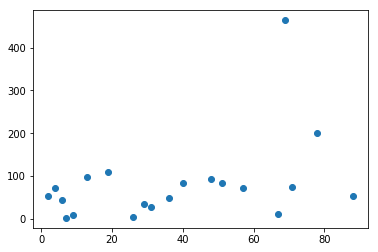

In [19]:
import matplotlib.pyplot as plt
x = [2,4,6,7,9,13,19,26,29,31,36,40,48,51,57,67,69,71,78,88]
y = [54,72,43,2,8,98,109,5,35,28,48,83,94,84,73,11,464,75,200,54]
plt.scatter(x,y)
plt.show()